# 1. For reading and understanding import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train1 =pd.read_csv(r'G:\kaggle-24\Titanic-23\train.csv')
df_test1 = pd.read_csv(r'G:\kaggle-24\Titanic-23\test.csv')
df = pd.concat([df_train1, df_test1], axis = 0, ignore_index = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Data preprocessing

In [3]:
df.shape

(1309, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

SibSp (Siblings/Spouses Aboard): The number of siblings or spouses the passenger had on board.
Parch (Parents/Children Aboard): The number of parents or children the passenger had on board.
                       Embarked: The port where the passenger boarded the ship. It can take values 
                                 'C' (Cherbourg), 'Q' (Queenstown), or 'S' (Southampton).

In [5]:
cat_features = df.select_dtypes(include='object').columns
num_features = df.select_dtypes(include = 'number').columns
print(f"categorical_features= {cat_features} \n numeric_features= {num_features}")

categorical_features= Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object') 
 numeric_features= Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [7]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

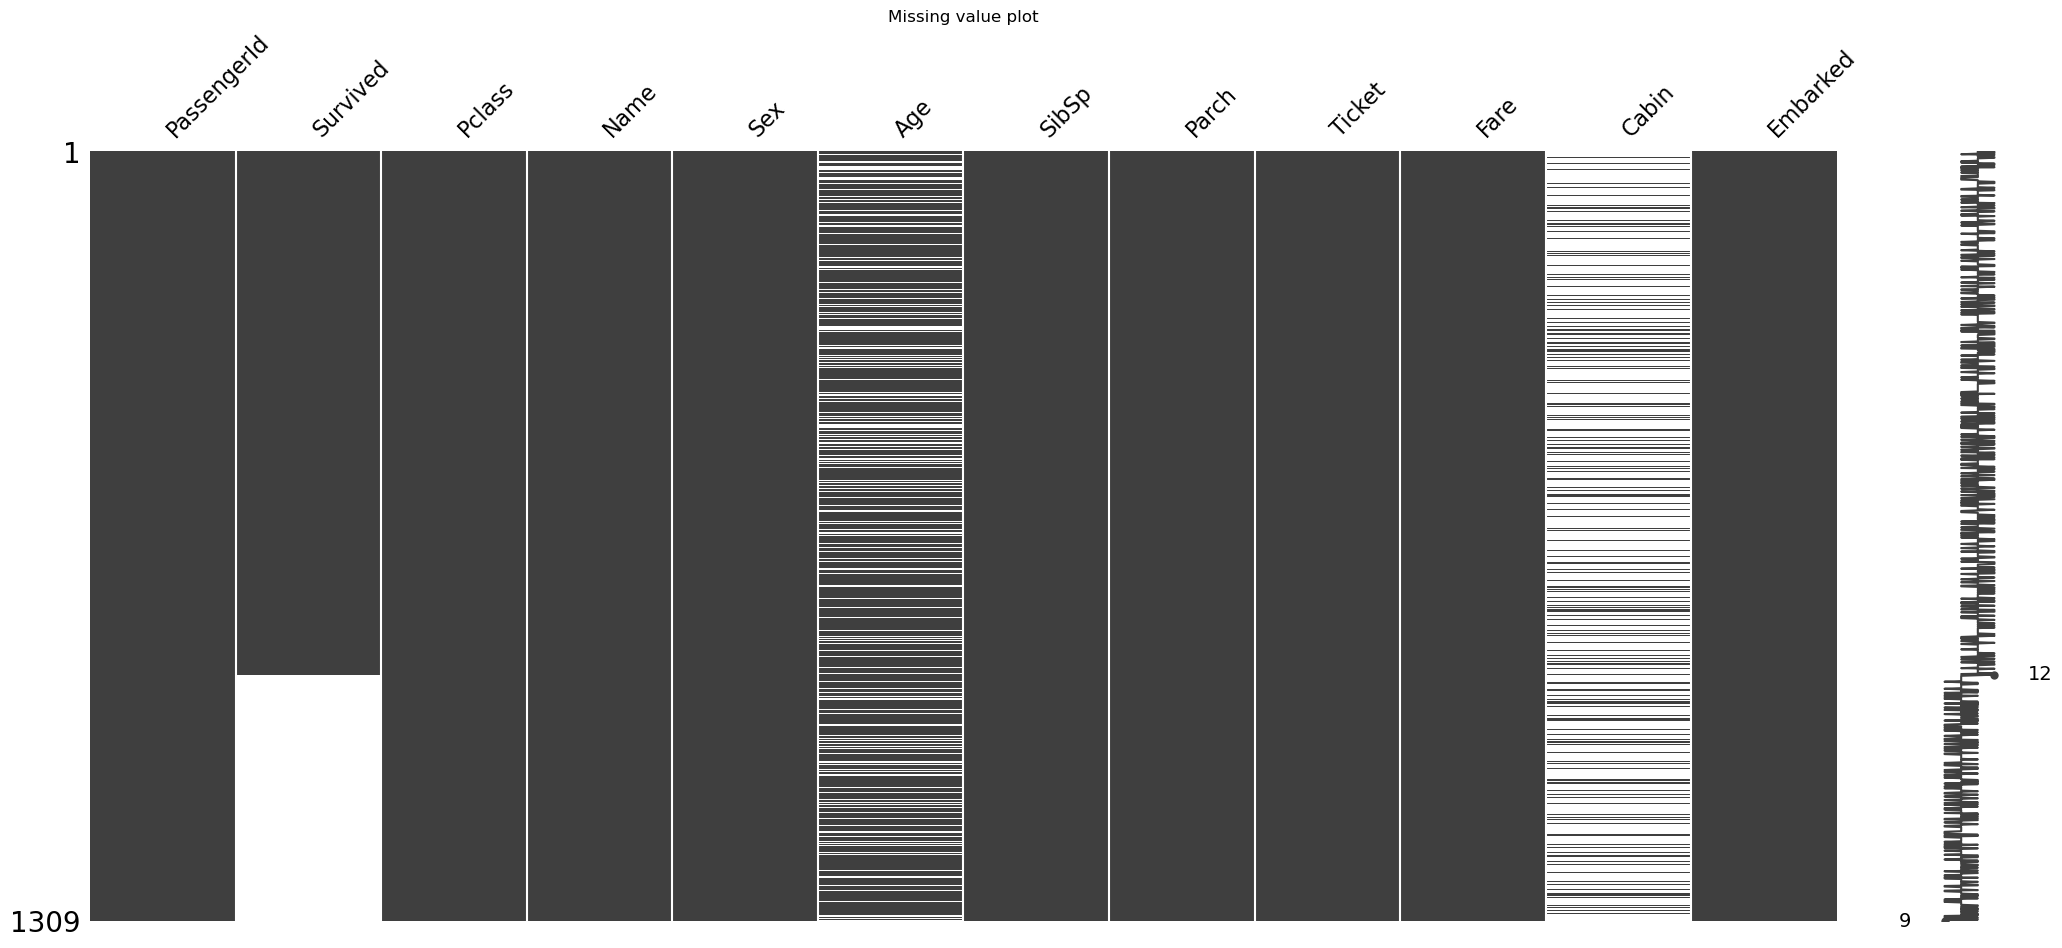

In [8]:
import missingno as msno
msno.matrix(df)
plt.title("Missing value plot")
plt.show()

In [9]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']
--------------------------------------------------
Sex
['male' 'female']
--------------------------------------------------
Ticket
['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '347077' '2631' '19950' '330959' '349216'
 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677'
 'A./5. 2152' '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123'
 '330958' 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295'
 'A/4. 39886' 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697'
 'C.A. 34651' 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661'
 'C.A. 29395' 'S.P. 3464' '3101281'

In [10]:
# Name, Cabin and Ticket feature is not relevant for predicting. So drop 3 features.
df.drop(columns = ["Name","Cabin","Ticket"], inplace = True)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,7.2500,S
1,2,1.0,1,female,38.0,1,0,71.2833,C
2,3,1.0,3,female,26.0,0,0,7.9250,S
3,4,1.0,1,female,35.0,1,0,53.1000,S
4,5,0.0,3,male,35.0,0,0,8.0500,S


In [12]:
df['Age']= df['Age'].fillna(df['Age'].median())
df['Embarked']= df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Fare']= df['Fare'].fillna(df['Fare'].mean())

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.503186,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,12.905241,1.041658,0.865560,51.738879
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# EDA

In [14]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print("."*50)

PassengerId
PassengerId
1       1
861     1
879     1
878     1
877     1
       ..
436     1
435     1
434     1
433     1
1309    1
Name: count, Length: 1309, dtype: int64
..................................................
Survived
Survived
0.0    549
1.0    342
Name: count, dtype: int64
..................................................
Pclass
Pclass
3    709
1    323
2    277
Name: count, dtype: int64
..................................................
Sex
Sex
male      843
female    466
Name: count, dtype: int64
..................................................
Age
Age
28.0    295
24.0     47
22.0     43
21.0     41
30.0     40
       ... 
23.5      1
70.5      1
55.5      1
20.5      1
38.5      1
Name: count, Length: 98, dtype: int64
..................................................
SibSp
SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64
..................................................
Parch
Parch
0    1002
1     170
2     113
3   

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

Not Survived    549
Survived        342
Name: count, dtype: int64
Sex
male      843
female    466
Name: count, dtype: int64


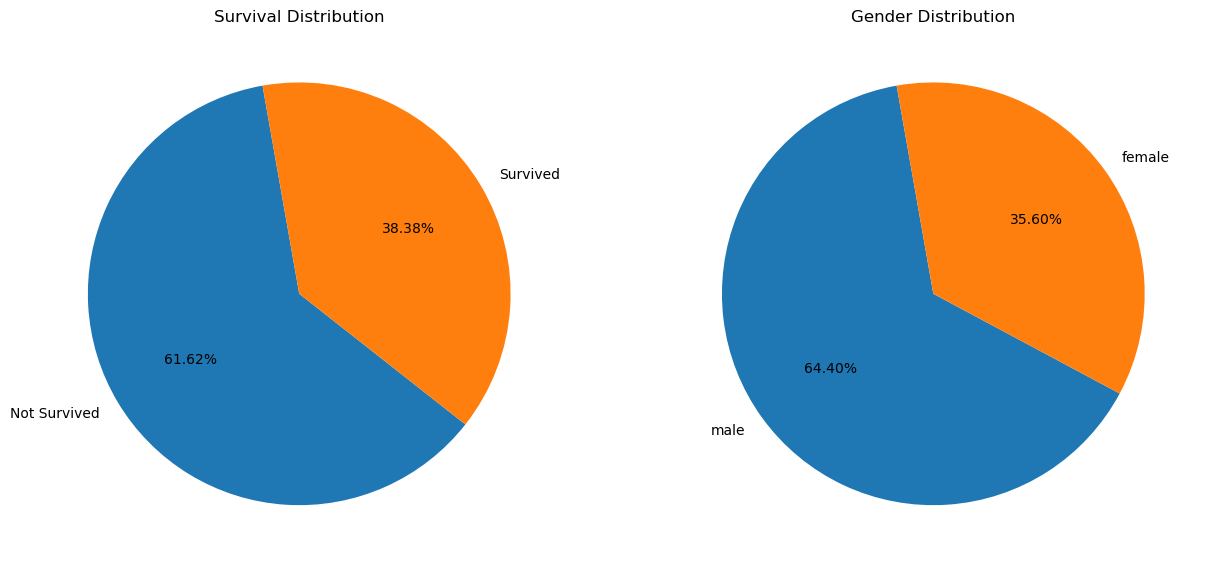

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Subplot 1: Pie chart for 'Survived'
plt.subplot(1, 2, 1)
value_survived = df['Survived'].value_counts()
value_survived.index = ['Not Survived', 'Survived']
print(value_survived)
plt.pie(value_survived, labels=value_survived.index, autopct="%1.2f%%", startangle=100)
plt.title('Survival Distribution')

# Subplot 2: Pie chart for 'Sex'
plt.subplot(1, 2, 2)
value_sex = df['Sex'].value_counts()
print(value_sex)
plt.pie(value_sex, labels=value_sex.index, autopct="%1.2f%%", startangle=100)
plt.title('Gender Distribution')

plt.show()

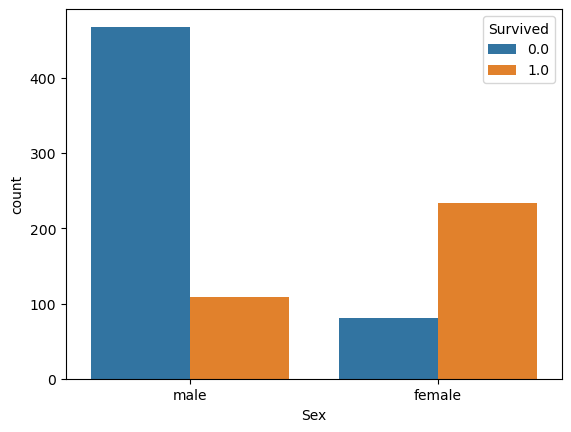

In [17]:
sns.countplot(data= df, x='Sex', hue='Survived')
plt.show()

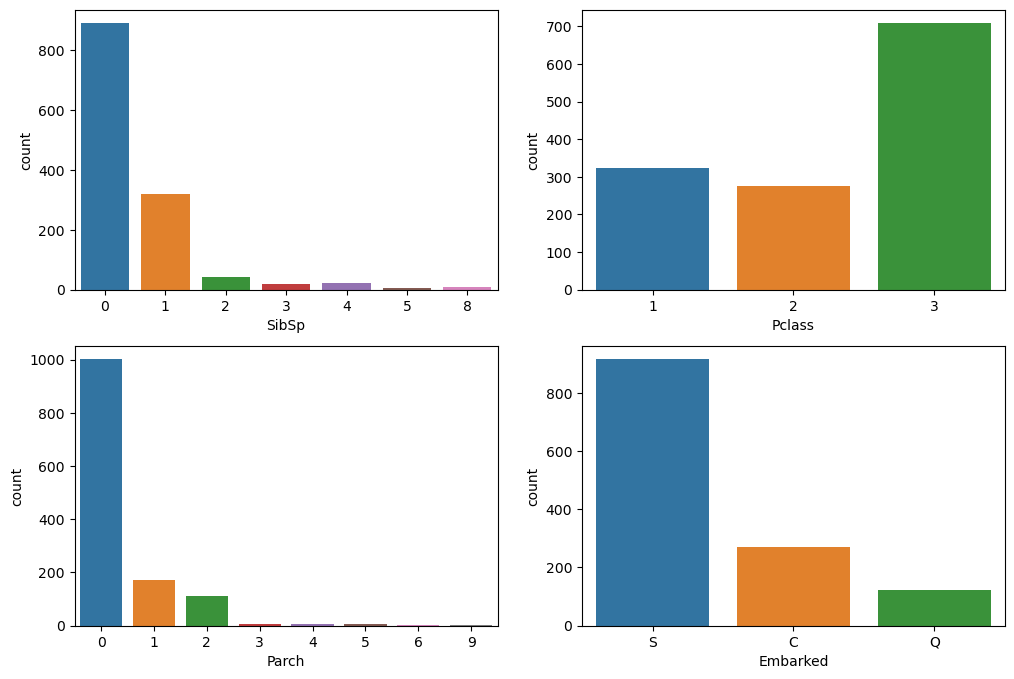

In [18]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data = df, x ="SibSp")

plt.subplot(2,2,2)
sns.countplot(data = df, x ="Pclass")

plt.subplot(2,2,3)
sns.countplot(data = df, x ="Parch")

plt.subplot(2,2,4)
sns.countplot(data = df, x ="Embarked")

plt.show()

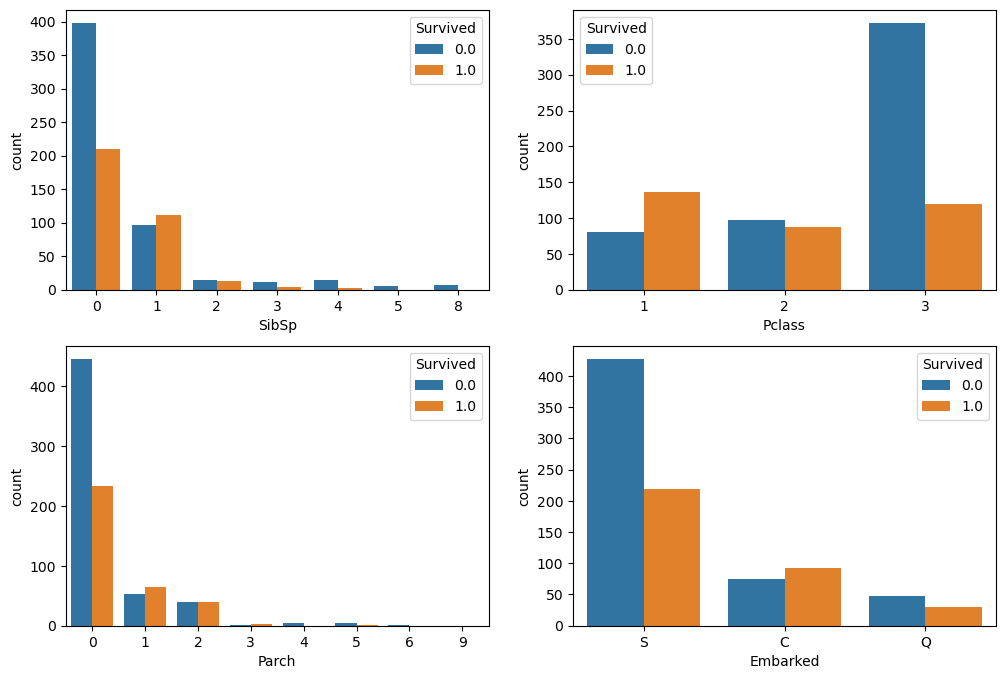

In [19]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(data = df, x ="SibSp", hue = 'Survived')

plt.subplot(2,2,2)
sns.countplot(data = df, x ="Pclass", hue = 'Survived')

plt.subplot(2,2,3)
sns.countplot(data = df, x ="Parch", hue = 'Survived')

plt.subplot(2,2,4)
sns.countplot(data = df, x ="Embarked", hue = 'Survived')

plt.show()

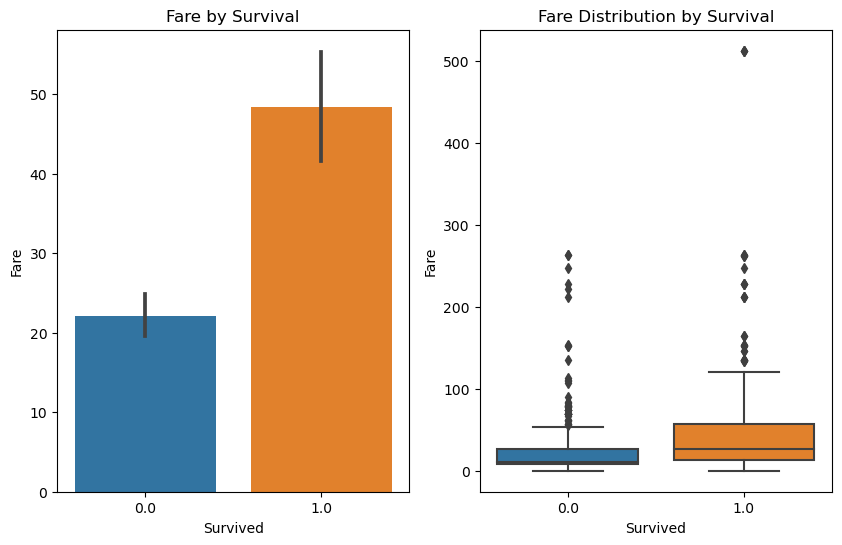

In [20]:
# Create a bar plot
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
sns.barplot(x='Survived', y='Fare', data=df)
plt.title('Fare by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')

plt.subplot(1,2,2)
sns.boxplot(x='Survived', y='Fare', data=df) 
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

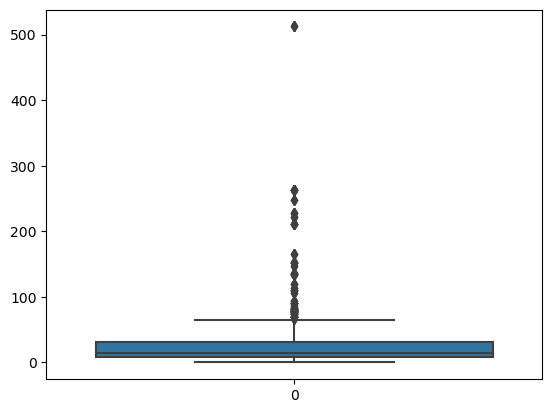

In [21]:
sns.boxplot(data=df['Fare']) 
plt.show()

In [22]:
df['Fare']

0         7.2500
1        71.2833
2         7.9250
3        53.1000
4         8.0500
          ...   
1304      8.0500
1305    108.9000
1306      7.2500
1307      8.0500
1308     22.3583
Name: Fare, Length: 1309, dtype: float64

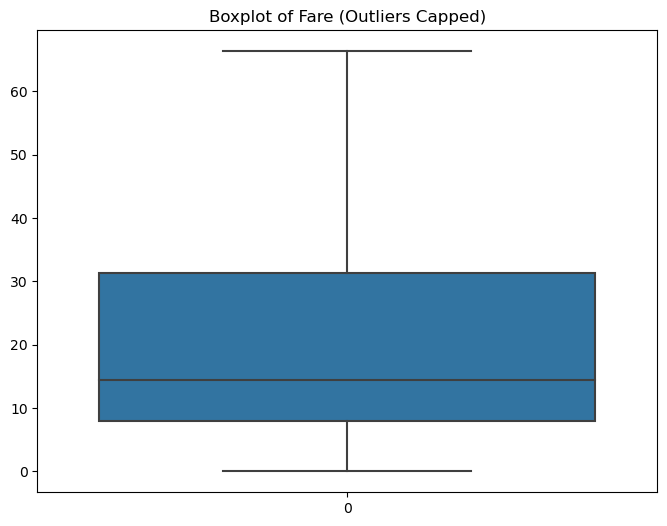

In [23]:
# Calculate quartiles and IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cap outliers by setting values beyond the bounds to the bounds
df['Fare'] = np.where(df['Fare'] > upper, upper, df['Fare'])

# Visualize the boxplot after capping outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Fare'])
plt.title('Boxplot of Fare (Outliers Capped)')
plt.show()

Skewness of Original Fare: 1.0878208718475646


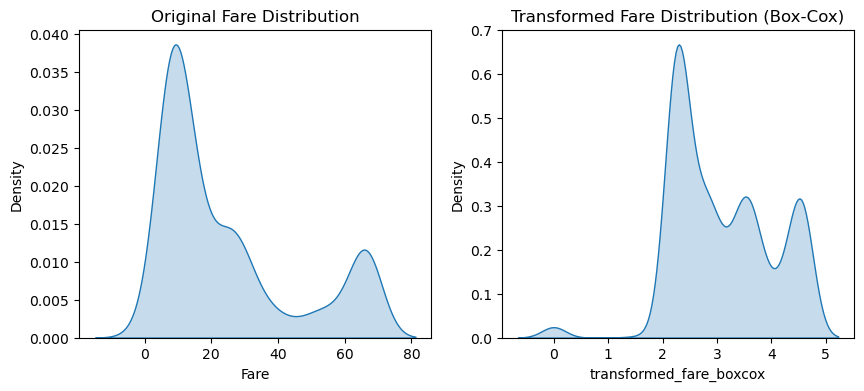

Skewness of Transformed Fare (Box-Cox): 0.0014409411328964684


In [24]:
from scipy.stats import boxcox

# Visualize the original distribution
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.kdeplot(df['Fare'], fill = True)
plt.title('Original Fare Distribution')


# Check skewness of the original "Fare" column
print("Skewness of Original Fare:", df['Fare'].skew())

# Apply the Box-Cox transformation
transformed_fare, lambda_value = boxcox(df['Fare'] + 1)  # Adding 1 to handle zero values
df['transformed_fare_boxcox'] = transformed_fare

# Visualize the transformed distribution
plt.subplot(1,2,2)
sns.kdeplot(df['transformed_fare_boxcox'], fill = True)
plt.title('Transformed Fare Distribution (Box-Cox)')
plt.show()

# Check skewness of the transformed "Fare" column
print("Skewness of Transformed Fare (Box-Cox):", df['transformed_fare_boxcox'].skew())

Skewness of Original Fare: 1.0878208718475646


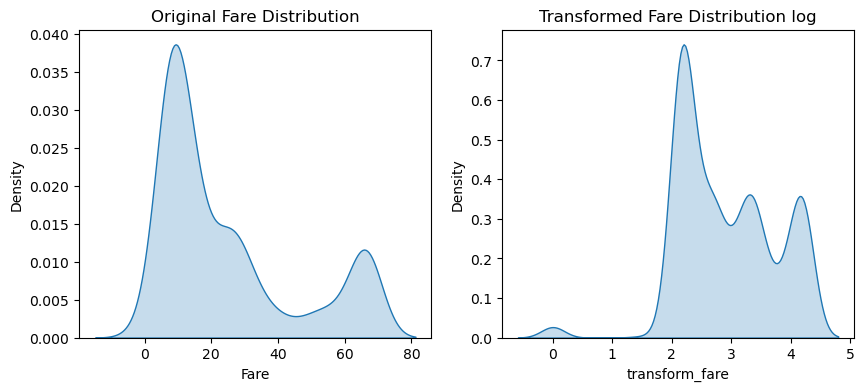

Skewness of Transformed Fare log: -0.10460035316263437


In [25]:
# Visualize the original distribution
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.kdeplot(df['Fare'], fill = True)
plt.title('Original Fare Distribution')


# Check skewness of the original "Fare" column
print("Skewness of Original Fare:", df['Fare'].skew())

# Apply the Box-Cox transformation
df['transform_fare'] = np.log1p(df['Fare'])

# Visualize the transformed distribution
plt.subplot(1,2,2)
sns.kdeplot(df['transform_fare'], fill = True)
plt.title('Transformed Fare Distribution log')
plt.show()

# Check skewness of the transformed "Fare" column
print("Skewness of Transformed Fare log:", df['transform_fare'].skew())

Skewness of Original Fare: 1.0878208718475646


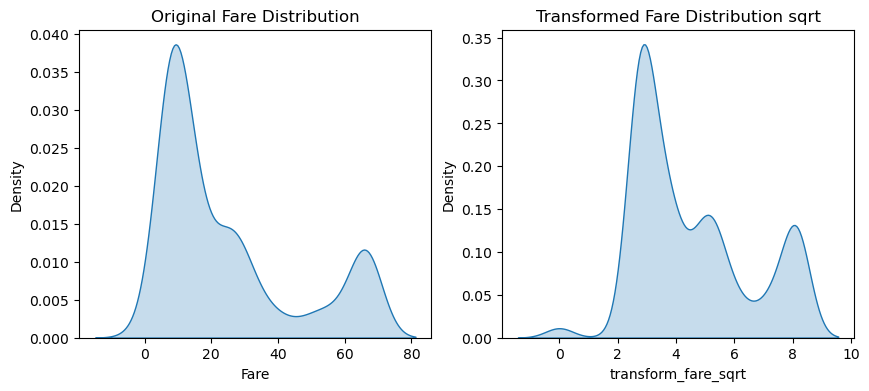

Skewness of Transformed Fare sqrt: 0.6322899818407495


In [26]:
# Visualize the original distribution
plt.figure(figsize=(10, 4))

plt.subplot(1,2,1)
sns.kdeplot(df['Fare'], fill = True)
plt.title('Original Fare Distribution')


# Check skewness of the original "Fare" column
print("Skewness of Original Fare:", df['Fare'].skew())

# Apply the Box-Cox transformation
df['transform_fare_sqrt'] = np.sqrt(df['Fare'])

# Visualize the transformed distribution
plt.subplot(1,2,2)
sns.kdeplot(df['transform_fare_sqrt'], fill = True)
plt.title('Transformed Fare Distribution sqrt')
plt.show()

# Check skewness of the transformed "Fare" column
print("Skewness of Transformed Fare sqrt:", df['transform_fare_sqrt'].skew())

In [27]:
df.drop(columns = ['Fare','transform_fare','transform_fare_sqrt'], inplace=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,transformed_fare_boxcox
0,1,0.0,3,male,22.0,1,0,S,2.198188
1,2,1.0,1,female,38.0,1,0,C,4.569691
2,3,1.0,3,female,26.0,0,0,S,2.283608
3,4,1.0,1,female,35.0,1,0,S,4.313319
4,5,0.0,3,male,35.0,0,0,S,2.298741


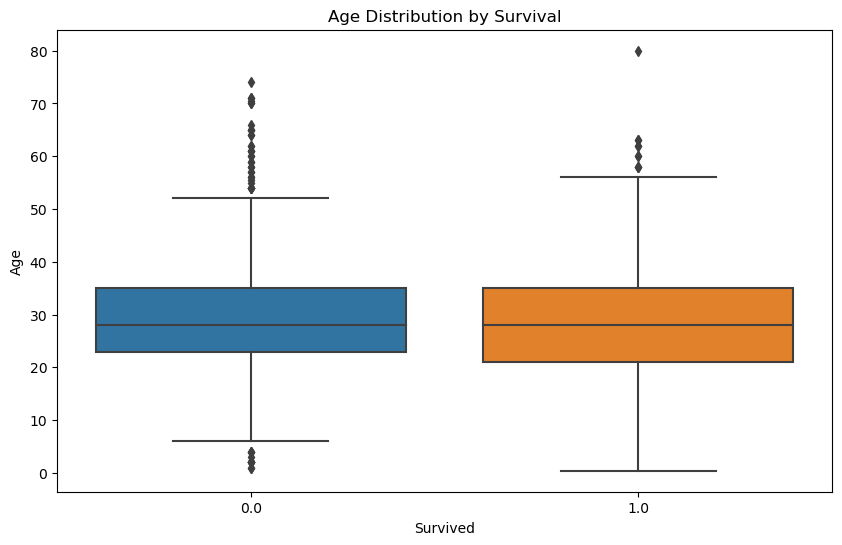

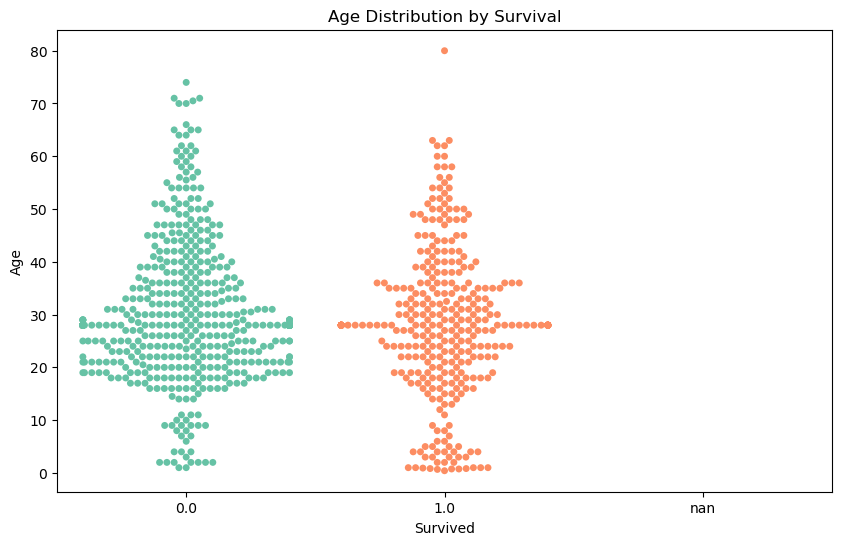

In [29]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Swarm plot (individual data points)
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Survived', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

In [30]:
def age(x):
    if x<=18:
        return "Kid"
    elif x<=35:
        return "Young"
    elif x<=50:
        return "Middle Age"
    else:
        return "Aged"
df['age_dis'] = df['Age'].apply(age)

In [31]:
df.drop(columns = ['Age'], inplace = True)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,transformed_fare_boxcox,age_dis
0,1,0.0,3,male,1,0,S,2.198188,Young
1,2,1.0,1,female,1,0,C,4.569691,Middle Age
2,3,1.0,3,female,0,0,S,2.283608,Young
3,4,1.0,1,female,1,0,S,4.313319,Young
4,5,0.0,3,male,0,0,S,2.298741,Young


In [33]:
df['family_size'] = df['SibSp'] + df['Parch']

In [34]:
df.drop(columns=['SibSp','Parch'], inplace = True)

In [35]:
df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,transformed_fare_boxcox,age_dis,family_size
0,1,0.0,3,male,S,2.198188,Young,1
1,2,1.0,1,female,C,4.569691,Middle Age,1
2,3,1.0,3,female,S,2.283608,Young,0
3,4,1.0,1,female,S,4.313319,Young,1
4,5,0.0,3,male,S,2.298741,Young,0


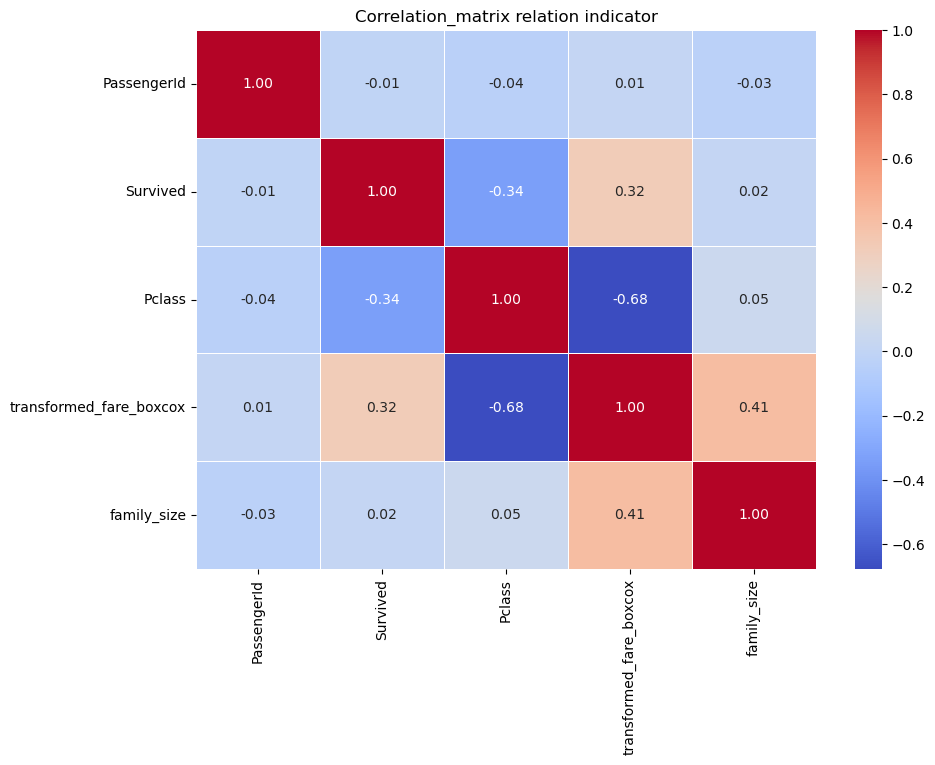

In [36]:
numeric_df = df.select_dtypes(include=[float, int])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10,7))

sns.heatmap(correlation_matrix, annot =True, fmt = ".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation_matrix relation indicator")
plt.show()

In [37]:
df.replace({'Sex':{'female':0, 'male':1}}, inplace = True)

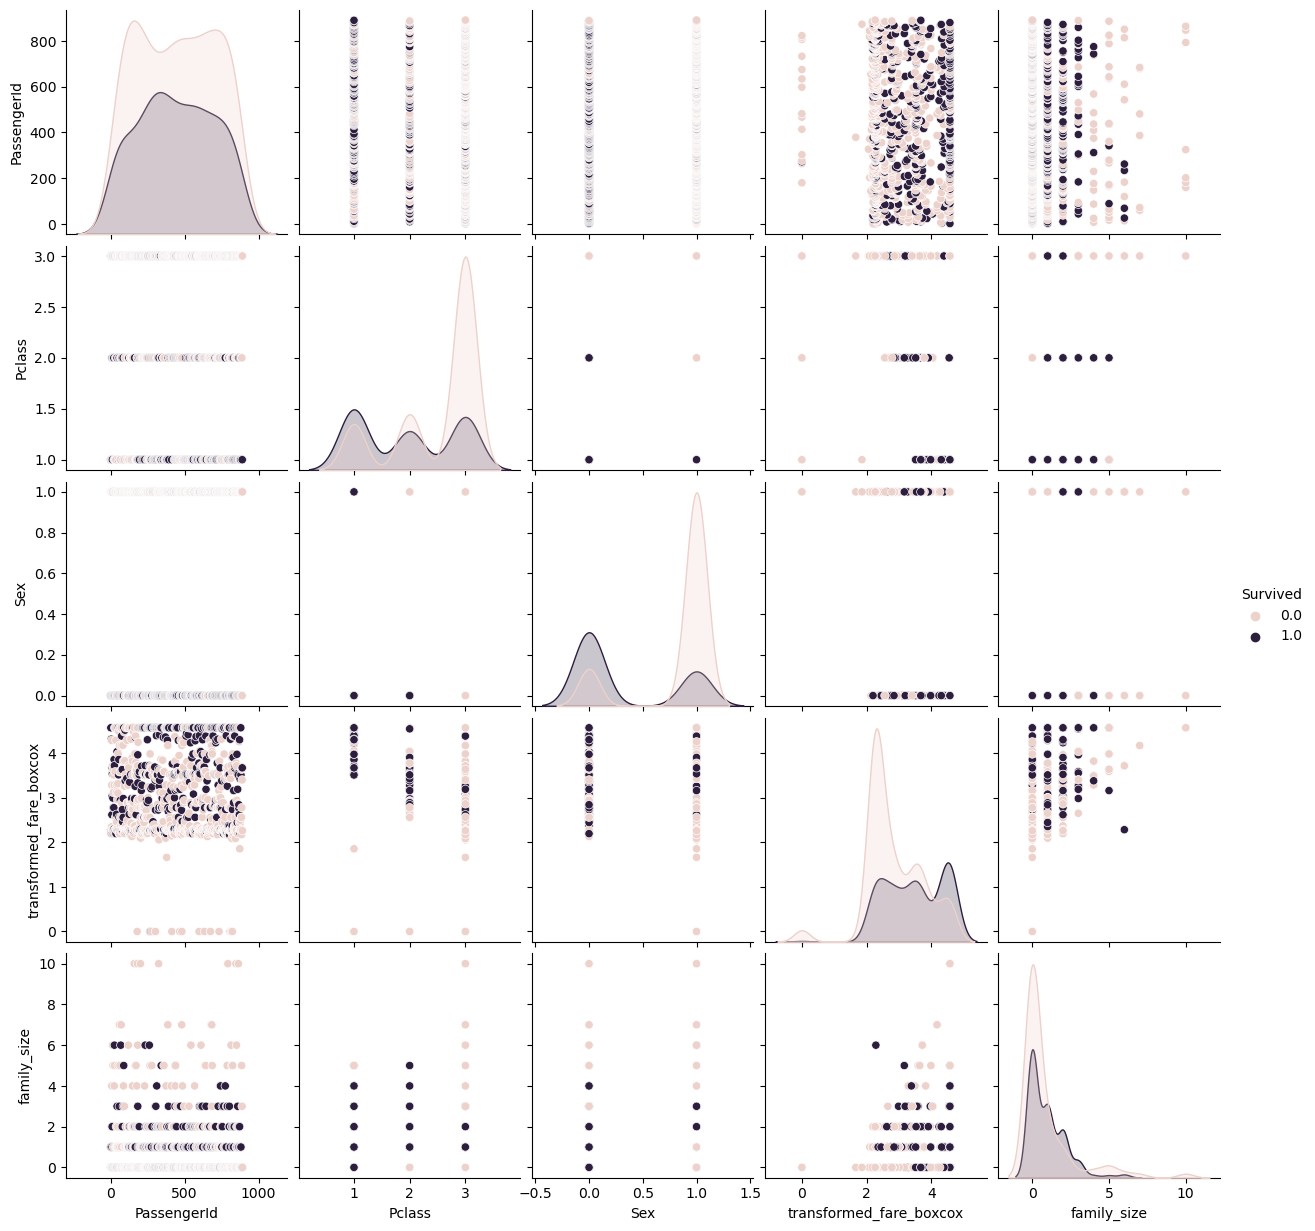

In [38]:
sns.pairplot(data=df, hue ='Survived')
plt.show()

In [39]:
# For future work create a data frame
train_cleaned_data = df.iloc[0:891]

train_cleaned_data.to_csv("cleaned_data.csv", index=False)

In [40]:
test_prepare_data = df.iloc[891:1309]
test_prepare_data.to_csv("test_prepare_data.csv", index=False)

In [41]:
df_train = train_cleaned_data.copy()

In [42]:
df_test = test_prepare_data.copy()

# Model Building & Evaluation

In [43]:
X = df_train.drop('Survived', axis = 1)
y = df_train['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 42)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,transformed_fare_boxcox,age_dis,family_size
0,1,0.0,3,1,S,2.198188,Young,1
1,2,1.0,1,0,C,4.569691,Middle Age,1
2,3,1.0,3,0,S,2.283608,Young,0
3,4,1.0,1,0,S,4.313319,Young,1
4,5,0.0,3,1,S,2.298741,Young,0


In [45]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_features = ['transformed_fare_boxcox']
ordinal_features = ['Pclass']
categorical_features = ['Sex', 'Embarked', 'age_dis']

preprocessor = ColumnTransformer( 
    transformers = [
        ("num", MinMaxScaler(), numeric_features),
        ("ord", OrdinalEncoder(), ordinal_features),
        ("cat", OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

# 1. LogisticRegression

In [46]:
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier', LogisticRegression())])

In [47]:
y_pred_train_lr = lr_pipeline.predict(X_train)
y_pred_test_lr = lr_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

print(f"Accuracy_train_LR: {accuracy_train_lr}\nAccuracy_test_LR: {accuracy_test_lr}")

cm = confusion_matrix(y_test, y_pred_test_lr)
print(f"Confusion_matrix :\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_lr = classification_report(y_test, y_pred_test_lr)

print(f"Classification_report:\n{classification_report_lr}")


Accuracy_train_LR: 0.8061797752808989
Accuracy_test_LR: 0.7988826815642458
Confusion_matrix :
 [[90 15]
 [21 53]]
Classification_report:
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       105
         1.0       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [48]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated scores
cross_val_scores = cross_val_score(lr_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of cross-validated scores
print("Cross-validated Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std()))


Cross-validated Accuracy: 0.79 (+/- 0.00)


# 2. RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split= 10, n_estimators= 100))
])

rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                                        min_samples_split=10))])

In [50]:
y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Accuracy_train_RF: {accuracy_train_rf}\nAccuracy_test_RF: {accuracy_test_rf}")

cm = confusion_matrix(y_test, y_pred_test_rf)
print(f"Confusion_matrix:\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_rf = classification_report(y_test, y_pred_test_rf)

print(f"Classification_report:\n{classification_report_rf}")

Accuracy_train_RF: 0.8778089887640449
Accuracy_test_RF: 0.8100558659217877
Confusion_matrix:
 [[92 13]
 [21 53]]
Classification_report:
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       105
         1.0       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [51]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated scores
cross_val_scores = cross_val_score(rf_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of cross-validated scores
print("Cross-validated Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std()))


Cross-validated Accuracy: 0.82 (+/- 0.02)


# Hyperparameter tune

In [52]:
from sklearn.model_selection import GridSearchCV


rf_classifier = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Create the pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', grid_search)
])

# Fit the pipeline to the data
rf_pipeline.fit(X_train, y_train)

# Get the best parameters from the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
y_pred_train_rf = rf_pipeline.predict(X_train)
y_pred_test_rf = rf_pipeline.predict(X_test)

# Evaluate the model
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Accuracy on Training Set: {accuracy_train_rf:.4f}")
print(f"Accuracy on Test Set: {accuracy_test_rf:.4f}")

cm_rf = confusion_matrix(y_test, y_pred_test_rf)
print(f"Confusion Matrix:\n{cm_rf}")

classification_report_rf = classification_report(y_test, y_pred_test_rf)
print(f"Classification Report:\n{classification_report_rf}")


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy on Training Set: 0.8581
Accuracy on Test Set: 0.8045
Confusion Matrix:
[[92 13]
 [22 52]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.88      0.84       105
         1.0       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# 3. SVM

In [53]:
from sklearn.svm import SVC

svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='linear', C=1.0))
])

svc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier', SVC(kernel='linear'))])

In [54]:
y_pred_train_svc = svc_pipeline.predict(X_train)
y_pred_test_svc = svc_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_svc = accuracy_score(y_train, y_pred_train_svc)
accuracy_test_svc = accuracy_score(y_test, y_pred_test_svc)

print(f"Accuracy_train_SVC: {accuracy_train_svc}\nAccuracy_test_SVC: {accuracy_test_svc}")

cm = confusion_matrix(y_test, y_pred_test_svc)
print(f"Confusion_matrix:\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_svc = classification_report(y_test, y_pred_test_svc)

print(f"Classification_report:\n{classification_report_svc}")

Accuracy_train_SVC: 0.7949438202247191
Accuracy_test_SVC: 0.7821229050279329
Confusion_matrix:
 [[88 17]
 [22 52]]
Classification_report:
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       105
         1.0       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [55]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated scores
cross_val_scores = cross_val_score(svc_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of cross-validated scores
print("Cross-validated Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std()))


Cross-validated Accuracy: 0.79 (+/- 0.02)


# 4. DecessionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

dc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier())
])

dc_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier', DecisionTreeClassifier())])

In [57]:
y_pred_train_dc = svc_pipeline.predict(X_train)
y_pred_test_dc = svc_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_dc = accuracy_score(y_train, y_pred_train_dc)
accuracy_test_dc = accuracy_score(y_test, y_pred_test_dc)

print(f"Accuracy_train_DC: {accuracy_train_dc}\nAccuracy_test_DC: {accuracy_test_dc}")

cm = confusion_matrix(y_test, y_pred_test_dc)
print(f"Confusion_matrix:\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_dc = classification_report(y_test, y_pred_test_dc)

print(f"Classification_report:\n{classification_report_dc}")

Accuracy_train_DC: 0.7949438202247191
Accuracy_test_DC: 0.7821229050279329
Confusion_matrix:
 [[88 17]
 [22 52]]
Classification_report:
              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       105
         1.0       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [58]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated scores
cross_val_scores = cross_val_score(dc_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of cross-validated scores
print("Cross-validated Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std()))

Cross-validated Accuracy: 0.74 (+/- 0.02)


# 5. KNeighborsClassifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier

kn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

kn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier', KNeighborsClassifier())])

In [60]:
y_pred_train_kn = kn_pipeline.predict(X_train)
y_pred_test_kn = kn_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_kn = accuracy_score(y_train, y_pred_train_kn)
accuracy_test_kn = accuracy_score(y_test, y_pred_test_kn)

print(f"Accuracy_train_KN: {accuracy_train_kn}\nAccuracy_test_KN: {accuracy_test_kn}")

cm = confusion_matrix(y_test, y_pred_test_kn)
print(f"Confusion_matrix:\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_kn = classification_report(y_test, y_pred_test_kn)

print(f"Classification_report:\n{classification_report_kn}")

Accuracy_train_KN: 0.726123595505618
Accuracy_test_KN: 0.5810055865921788
Confusion_matrix:
 [[79 26]
 [49 25]]
Classification_report:
              precision    recall  f1-score   support

         0.0       0.62      0.75      0.68       105
         1.0       0.49      0.34      0.40        74

    accuracy                           0.58       179
   macro avg       0.55      0.55      0.54       179
weighted avg       0.56      0.58      0.56       179



# 6. GradientBoostingClassifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=110, learning_rate=0.02))
])

gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['transformed_fare_boxcox']),
                                                 ('ord', OrdinalEncoder(),
                                                  ['Pclass']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Sex', 'Embarked',
                                                   'age_dis'])])),
                ('classifier',
                 GradientBoostingClassifier(learning_rate=0.02,
                                            n_estimators=110))])

In [62]:
y_pred_train_gb = gb_pipeline.predict(X_train)
y_pred_test_gb = gb_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_pred_train and y_pred_test are your predicted values
accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)
accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb)

print(f"Accuracy_train_GB: {accuracy_train_gb}\nAccuracy_test_gb: {accuracy_test_gb}")

cm = confusion_matrix(y_test, y_pred_test_gb)
print(f"Confusion_matrix:\n {cm}")

# Rename the variable to avoid conflicts with the function name
classification_report_gb = classification_report(y_test, y_pred_test_gb)

print(f"Classification_report:\n{classification_report_gb}")

Accuracy_train_GB: 0.8412921348314607
Accuracy_test_gb: 0.7988826815642458
Confusion_matrix:
 [[93 12]
 [24 50]]
Classification_report:
              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       105
         1.0       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



In [63]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated scores
cross_val_scores = cross_val_score(gb_pipeline, X, y, cv=cv, scoring='accuracy')

# Print the mean and standard deviation of cross-validated scores
print("Cross-validated Accuracy: {:.2f} (+/- {:.2f})".format(cross_val_scores.mean(), cross_val_scores.std()))


Cross-validated Accuracy: 0.80 (+/- 0.02)


In [64]:
# Define the hyperparameter grid to search
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters on the entire training set
best_gb_model = gb_pipeline.set_params(**best_params)
best_gb_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = best_gb_model.predict(X_train)
accuracy = accuracy_score(y_train, y_val_pred)
print(f"Validation Accuracy: {accuracy}")

# Test the final model on the test set
y_test_pred = best_gb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Best Hyperparameters: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Validation Accuracy: 0.9536516853932584
Test Accuracy: 0.7988826815642458


Decision: here RandomForestClassifier or GradientBoodting may apply for better accuracy!

# Make Prediction

In [65]:
def predict_survival(passenger_id, model, df):
    passenger_data = df[df['PassengerId'] == passenger_id]

    if not passenger_data.empty:
        # Extract relevant features for prediction
        features = passenger_data.drop('Survived', axis=1)

        # Make prediction
        prediction = rf_pipeline.predict(features)

        return f"Passenger {passenger_id} is predicted to {'survive' if prediction[0] == 1 else 'not survive'}."

    return f"No data found for Passenger {passenger_id}."

# Example usage
passenger_id_to_predict =901
result = predict_survival(passenger_id_to_predict, rf_pipeline, df)
print(result)

Passenger 901 is predicted to not survive.


In [66]:
# Test data prediction

In [67]:
path = r"G:\kaggle-24\Titanic-23\test_prepare_data.csv"
test_df = pd.read_csv(path)
test_df.head()

,PassengerId,Survived,Pclass,Sex,Embarked,transformed_fare_boxcox,age_dis,family_size
0,892,NaN,3,1,Q,2.271871,Young,0
1,893,NaN,3,0,S,2.164835,Middle Age,1
2,894,NaN,2,1,Q,2.480332,Aged,0
3,895,NaN,3,1,S,2.370107,Young,0
4,896,NaN,3,0,S,2.719849,Young,2


In [68]:
test_df.drop(columns = 'Survived', inplace = True)

In [69]:
test_df.shape

(418, 7)

In [70]:
test_df.head()

,PassengerId,Pclass,Sex,Embarked,transformed_fare_boxcox,age_dis,family_size
0,892,3,1,Q,2.271871,Young,0
1,893,3,0,S,2.164835,Middle Age,1
2,894,2,1,Q,2.480332,Aged,0
3,895,3,1,S,2.370107,Young,0
4,896,3,0,S,2.719849,Young,2


In [71]:
test_df.isnull().sum()

PassengerId                0
Pclass                     0
Sex                        0
Embarked                   0
transformed_fare_boxcox    0
age_dis                    0
family_size                0
dtype: int64

In [72]:
# Select features for prediction from the test data
test_features = test_df[['PassengerId', 'Pclass', 'Sex', 'Embarked', 'transformed_fare_boxcox', 'age_dis', 'family_size']]

# Make predictions on the test data
test_predictions = rf_pipeline.predict(test_features)

# Create a DataFrame with 'PassengerId' and predicted 'Survived'
submission_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_predictions})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)

In [73]:
submission = pd.read_csv(r"G:\kaggle-24\Titanic-23\submission.csv")
submission.shape

(418, 2)

In [74]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 6.7 KB
